# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import os
import pickle

data_dir = os.path.relpath('traffic-signs-data')
training_file = os.path.join(data_dir, 'train.p')
validation_file = os.path.join(data_dir, 'valid.p')
testing_file = os.path.join(data_dir, 'test.p')

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES


### Basic Summary of the Data Set

In [2]:
import numpy as np

n_train = len(X_train)
n_valid = len(X_valid)
n_test = len(X_test)
n_total = n_train + n_valid + n_test

train_classes = np.unique(y_train, return_counts=True)
n_classes = len(train_classes[0])

image_shape = X_train[0].shape

print("Number of training examples   = {0} \t{1:.1f}%".format(n_train, 100*n_train/n_total))
print("Number of validation examples = {0} \t{1:.1f}%".format(n_valid, 100*n_valid/n_total))
print("Number of testing examples    = {0} \t{1:.1f}%".format(n_test, 100*n_test/n_total))
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples   = 34799 	67.1%
Number of validation examples = 4410 	8.5%
Number of testing examples    = 12630 	24.4%
Image data shape = (32, 32, 3)
Number of classes = 43


### Exploratory Visualization of the Data Set

In [3]:
# Load label descriptions
import csv
import pandas as pd

class_file = os.path.relpath('signnames.csv')
class_descriptions = pd.read_csv(class_file, delimiter=',')
print(class_descriptions)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vehicles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

A random image from the training data:
(Index: 34047, class: 25)
Class Description: Road work


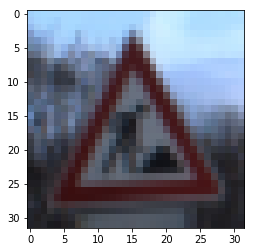

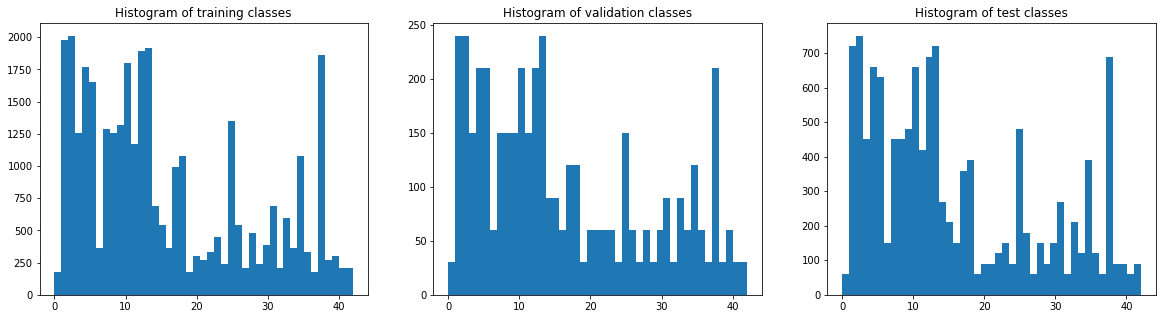

In [4]:
# Visualize the German Traffic Signs Dataset using the pickled file(s).
import matplotlib.pyplot as plt
%matplotlib inline

# Random image from train data
random_idx = np.random.randint(0, n_train)
random_img = X_train[random_idx]
random_class = y_train[random_idx]
plt.imshow(random_img)

# Display image
print('A random image from the training data:')
print('(Index: {0}, class: {1})'.format(random_idx, random_class))
print('Class Description: {0}'.format(class_descriptions.iloc[random_class]['SignName']))
plt.show()

# Histogram of classes for train/valid/test datasets
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.hist(y_train, n_classes)
plt.title('Histogram of training classes')
plt.subplot(132)
plt.hist(y_valid, n_classes)
plt.title('Histogram of validation classes')
plt.subplot(133)
plt.hist(y_test, n_classes)
plt.title('Histogram of test classes')

# Display and save histogram
plt.show()
plt.savefig('histogram.jpg')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Then train and test the model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

### Pre-process the Data Set

Preprocessing steps:
 - Normalize data set so that the images approximately have mean zero and equal variance by the formula, `(pixel - 128)/ 128`.

In [5]:
def normalize_img(img):
    """
    Normalize pixel values. Converts from [0, 225] to [-1, 1).
    """
    return (img - 128.) / 128.

X_train_norm = normalize_img(X_train)
X_valid_norm = normalize_img(X_valid)
X_test_norm = normalize_img(X_test)

### Define Model Architectures

Build a modified LeNet network according to the inference/loss/training pattern for model building.
  1. *_inference() - Builds the model as far as is required for running the network
     forward to make predictions.
  2. *_loss() - Adds to the inference model the layers required to generate loss.
  3. training() - Adds to the loss model the ops required to generate and apply gradients.

Note: Inference/Train/Loss structure and comments modeled after this [Tensorflow mnist tutorial](https://www.tensorflow.org/get_started/mnist/mechanics).

In [6]:
# Define generalized layers for building model architectures
import math
import tensorflow as tf

def fullLayer(x, weights, bias, activation):
    """Returns a fully connected layer"""
    full = tf.matmul(x, weights)
    full = tf.add(full, bias)
    full = activation(full)
    return full

def convLayer(x, weights, strides, padding, bias, activation):
    """Returns a basic convolutional layer"""
    conv = tf.nn.conv2d(x, weights, strides=strides, padding=padding)
    conv = tf.nn.bias_add(conv, bias)
    conv = activation(conv)
    return conv

def localContrastNormalizationLayer(conv):
    """Returns `conv` layer with local contrast normalized applied"""
    mean, variance = tf.nn.moments(conv, axes=[0,1,2])
    normalized = (conv - mean) / variance
    return normalized

In [7]:
def LeNet_w_dropout_inference(images, image_shape, n_output_nodes, activation=tf.nn.relu):
    """
    Build the LeNet model up to where it may be used for inference.
    Args:
      images: Images placeholder, from inputs(). 
      image_shape: Shape of images. Assumes images have shape (32, 32, depth), where depth is 1 for grayscale or 3 for RGB images."
      n_output_nodes: Number of output nodes. Typically, for classification tasks, this should be set to the number of valid classes.
      activation: Activation function to use. Defaults is ReLU.
    Returns:
      softmax_linear: Output tensor with the computed logits.
      keep_prob: Dropout keep probability.
    """
    
    # define network architecture
    # (c=convolutional, p=pooling, f=fully connected)
    
    image_depth = image_shape[2]
    image_pixels = image_shape[0]*image_shape[1]
    
    assert image_pixels == 32*32, "LeNet architecture requires that images have shape (32, 32, depth). Supplied `image_shape` parameter is {0}".format(image_shape)
    
    # mean and stddev for weight initialization
    mu = 0
    sigma = 0.1
    
    layers = {
        # Input = 32x32ximage_depth. Output = 28x28x6.
        'c1': {'shape': (5, 5, image_depth, 6), 'strides':[1, 1, 1, 1], 'padding':'VALID', 'activation': activation},
        # Input = 28x28x6. Output = 14x14x6.
        'p1': {'ksize': [1, 2, 2, 1], 'strides': [1, 2, 2, 1], 'padding':'VALID'},
        # Input = 14x14x6. Output = 10x10x16.
        'c2': {'shape': (5, 5, 6, 16), 'strides':[1, 1, 1, 1], 'padding':'VALID', 'activation': activation},
        # Input = 10x10x16. Output = 5x5x16.
        'p2': {'ksize': [1, 2, 2, 1], 'strides': [1, 2, 2, 1], 'padding':'VALID'},
        # Input = 5x5x16. Output = 400.
        'flat': {},
        # Input = 400. Output = 120.
        'f1': {'shape': (5*5*16, 120), 'activation': activation},
        # Layer 6: Input = 120. Output = 84.
        'f2': {'shape': (120, 84), 'activation': activation},
        # Input = 84. Output = n_classes.
        'softmax': {'shape': (84, n_output_nodes)}
    }
    
    # Weights: initalize to truncated normal distribution
    W = {key: tf.Variable(tf.truncated_normal(layers[key]['shape'], mean=mu, stddev=sigma)) \
         for key in layers.keys() if 'shape' in layers[key]}
    
    # Biases: initialize to 0s
    b = {key: tf.Variable(tf.zeros((layers[key]['shape'][-1]))) \
         for key in layers.keys() if 'shape' in layers[key]}
    
    keep_prob = tf.placeholder(tf.float32)
    
    with tf.name_scope('convPoolLcn1'):
        conv1 = convLayer(images, W['c1'], layers['c1']['strides'], layers['c1']['padding'], b['c1'], layers['c1']['activation'])
        conv1 = tf.nn.max_pool(conv1, ksize=layers['p1']['ksize'], strides=layers['p1']['strides'], padding=layers['p1']['padding'])
    with tf.name_scope('ConvPoolLcn2'):
        conv2 = convLayer(conv1, W['c2'], layers['c2']['strides'], layers['c2']['padding'], b['c2'], layers['c2']['activation'])
        conv2 = tf.nn.max_pool(conv2, ksize=layers['p2']['ksize'], strides=layers['p2']['strides'], padding=layers['p2']['padding'])
    with tf.name_scope('flat'):
        flat = tf.contrib.layers.flatten(conv2)
    with tf.name_scope('full1wDropout'):
        full1 = fullLayer(flat, W['f1'], b['f1'], layers['f1']['activation'])
        full1 = tf.nn.dropout(full1, keep_prob)
    with tf.name_scope('full2'):
        full2 = fullLayer(full1, W['f2'], b['f2'], layers['f2']['activation'])
    with tf.name_scope('softmax_linear'):
        logits = tf.add(tf.matmul(full2, W['softmax']), b['softmax'])
    
    return (logits, keep_prob)

In [8]:
def LeNet_w_residuals_inference(images, image_shape, n_classes, activation=tf.nn.relu):
    """
    Build the LeNet model up to where it may be used for inference.
    Args:
      images: Images placeholder, from inputs(). 
      image_shape: Shape of images. Assumes images have shape (32, 32, depth), where depth is 1 for grayscale or 3 for RGB images."
      n_output_nodes: Number of output nodes. Typically, for classification tasks, this should be set to the number of valid classes.
      activation: Activation function to use. Defaults is ReLU.
    Returns:
      softmax_linear: Output tensor with the computed logits.
      keep_prob: Dropout keep probability.
    """
    
    # define network architecture
    # (c=convolutional, p=pooling, f=fully connected)
    
    image_depth = image_shape[2]
    image_pixels = image_shape[0]*image_shape[1]
    
    assert image_pixels == 32*32, "LeNet architecture requires that images have shape (32, 32, depth). Supplied `image_shape` parameter is {0}".format(image_shape)
    
    # mean and stddev for weight initialization
    mu = 0
    sigma = 0.1
    
    layers = {
        # Input = 32x32ximage_depth. Output = 32x32x8.
        'c1': {'shape': (5, 5, image_depth, 8), 'strides':[1, 1, 1, 1], 'padding':'SAME', 'activation': activation},
        # Input = 32x32x8. Output = 16x16x8.
        'p1': {'ksize': [1, 2, 2, 1], 'strides': [1, 2, 2, 1], 'padding':'VALID'},
        # Input = 16x16x8. Output = 16x16x8.
        'c2': {'shape': (3, 3, 8, 8), 'strides':[1, 1, 1, 1], 'padding':'SAME', 'activation': activation},
        # Input = 16x16x8. Output = 8x8x8.
        'p2': {'ksize': [1, 2, 2, 1], 'strides': [1, 2, 2, 1], 'padding':'VALID'},
        # Input = 8x8x8. Output = 8x8x32.
        'c3': {'shape': (3, 3, 8, 32), 'strides':[1, 1, 1, 1], 'padding':'SAME', 'activation': activation},
        # Input = 8x8x32. Output = 4x4x32.
        'p3': {'ksize': [1, 2, 2, 1], 'strides': [1, 2, 2, 1], 'padding':'VALID'},
        # Input = 4x4x32. Output = 4x4x32.
        'c4': {'shape': (1, 1, 32, 32), 'strides':[1, 1, 1, 1], 'padding':'SAME', 'activation': activation},
        # Input = 4x4x32. Output = 512.
        'flat': {},
        # Input = 512. Output = 120.
        'f1': {'shape': (4*4*32, 120), 'activation': activation},
        # Layer 6: Input = 120. Output = 84.
        'f2': {'shape': (120, 84), 'activation': activation},
        # Input = 84. Output = n_classes.
        'softmax': {'shape': (84, n_classes)}
    }
    
    # Weights: initalize to truncated normal distribution
    W = {key: tf.Variable(tf.truncated_normal(layers[key]['shape'], mean=mu, stddev=sigma)) \
         for key in layers.keys() if 'shape' in layers[key]}
    
    # Biases: initialize to 0s
    b = {key: tf.Variable(tf.zeros((layers[key]['shape'][-1]))) \
         for key in layers.keys() if 'shape' in layers[key]}
    
    keep_prob = tf.placeholder(tf.float32)
    
    with tf.name_scope('convPool1'):
        conv1 = convLayer(images, 
                          W['c1'], layers['c1']['strides'], layers['c1']['padding'], 
                          b['c1'], layers['c1']['activation'])
        conv1 = tf.nn.max_pool(conv1, 
                               ksize=layers['p1']['ksize'], strides=layers['p1']['strides'], padding=layers['p1']['padding'])
    with tf.name_scope('ConvPoolResid2'):
        conv2 = conv1 - convLayer(conv1, 
                                  W['c2'], layers['c2']['strides'], layers['c2']['padding'], 
                                  b['c2'], layers['c2']['activation'])
        conv2 = tf.nn.max_pool(conv2, 
                               ksize=layers['p2']['ksize'], strides=layers['p2']['strides'], padding=layers['p2']['padding'])
    with tf.name_scope('ConvPool3'):
        conv3 = convLayer(conv2,
                          W['c3'], layers['c3']['strides'], layers['c3']['padding'], 
                          b['c3'], layers['c3']['activation'])
        conv3 = tf.nn.max_pool(conv3, 
                               ksize=layers['p3']['ksize'], strides=layers['p3']['strides'], padding=layers['p3']['padding'])
    with tf.name_scope('ConvPoolResid4'):
        conv4 = conv3 - convLayer(conv3, 
                                  W['c4'], layers['c4']['strides'], layers['c4']['padding'], 
                                  b['c4'], layers['c4']['activation'])
    with tf.name_scope('flat'):
        flat = tf.contrib.layers.flatten(conv4)
    with tf.name_scope('full1wDropout'):
        full1 = fullLayer(flat, 
                          W['f1'], b['f1'], layers['f1']['activation'])
        full1 = tf.nn.dropout(full1, keep_prob)
    with tf.name_scope('full2'):
        full2 = fullLayer(full1, 
                          W['f2'], b['f2'], layers['f2']['activation'])
    with tf.name_scope('softmax_linear'):
        logits = tf.add(tf.matmul(full2, W['softmax']), b['softmax'])
    
    return (logits, keep_prob)

In [9]:
def LeNet_w_lcn_inference(images, image_shape, n_output_nodes, activation=tf.nn.relu):
    """
    Build the LeNet model up to where it may be used for inference.
    Args:
      images: Images placeholder, from inputs(). 
      image_shape: Shape of images. Assumes images have shape (32, 32, depth), where depth is 1 for grayscale or 3 for RGB images."
      n_output_nodes: Number of output nodes. Typically, for classification tasks, this should be set to the number of valid classes.
      activation: Activation function to use. Defaults is ReLU.
    Returns:
      softmax_linear: Output tensor with the computed logits.
      keep_prob: Dropout keep probability.
    """
    
    # define network architecture
    # (c=convolutional, p=pooling, f=fully connected)
    
    image_depth = image_shape[2]
    image_pixels = image_shape[0]*image_shape[1]
    
    assert image_pixels == 32*32, "LeNet architecture requires that images have shape (32, 32, depth). Supplied `image_shape` parameter is {0}".format(image_shape)
    
    # mean and stddev for weight initialization
    mu = 0
    sigma = 0.1
    
    layers = {
        # Input = 32x32ximage_depth. Output = 28x28x6.
        'c1': {'shape': (5, 5, image_depth, 6), 'strides':[1, 1, 1, 1], 'padding':'VALID', 'activation': activation},
        # Input = 28x28x6. Output = 14x14x6.
        'p1': {'ksize': [1, 2, 2, 1], 'strides': [1, 2, 2, 1], 'padding':'VALID'},
        # Local Contrast Normalization (no change in size).
        'lcn1': {},
        # Input = 14x14x6. Output = 10x10x16.
        'c2': {'shape': (5, 5, 6, 16), 'strides':[1, 1, 1, 1], 'padding':'VALID', 'activation': activation},
        # Input = 10x10x16. Output = 5x5x16.
        'p2': {'ksize': [1, 2, 2, 1], 'strides': [1, 2, 2, 1], 'padding':'VALID'},
        # Local Contrast Normalization (no change in size).
        'lcn2': {},
        # Input = 5x5x16. Output = 400.
        'flat': {},
        # Input = 400. Output = 120.
        'f1': {'shape': (5*5*16, 120), 'activation': activation},
        # Layer 6: Input = 120. Output = 84.
        'f2': {'shape': (120, 84), 'activation': activation},
        # Input = 84. Output = n_classes.
        'softmax': {'shape': (84, n_output_nodes)}
    }
    
    # Weights: initalize to truncated normal distribution
    W = {key: tf.Variable(tf.truncated_normal(layers[key]['shape'], mean=mu, stddev=sigma)) \
         for key in layers.keys() if 'shape' in layers[key]}
    
    # Biases: initialize to 0s
    b = {key: tf.Variable(tf.zeros((layers[key]['shape'][-1]))) \
         for key in layers.keys() if 'shape' in layers[key]}
    
    keep_prob = tf.placeholder(tf.float32)
    
    with tf.name_scope('convPoolLcn1'):
        conv1 = convLayer(images, W['c1'], layers['c1']['strides'], layers['c1']['padding'], b['c1'], layers['c1']['activation'])
        conv1 = tf.nn.max_pool(conv1, ksize=layers['p1']['ksize'], strides=layers['p1']['strides'], padding=layers['p1']['padding'])
        conv1 = localContrastNormalizationLayer(conv1)
    with tf.name_scope('ConvPoolLcn2'):
        conv2 = convLayer(conv1, W['c2'], layers['c2']['strides'], layers['c2']['padding'], b['c2'], layers['c2']['activation'])
        conv2 = tf.nn.max_pool(conv2, ksize=layers['p2']['ksize'], strides=layers['p2']['strides'], padding=layers['p2']['padding'])
        conv2 = localContrastNormalizationLayer(conv2)
    with tf.name_scope('flat'):
        flat = tf.contrib.layers.flatten(conv2)
    with tf.name_scope('full1wDropout'):
        full1 = fullLayer(flat, W['f1'], b['f1'], layers['f1']['activation'])
        full1 = tf.nn.dropout(full1, keep_prob)
    with tf.name_scope('full2'):
        full2 = fullLayer(full1, W['f2'], b['f2'], layers['f2']['activation'])
    with tf.name_scope('softmax_linear'):
        logits = tf.add(tf.matmul(full2, W['softmax']), b['softmax'])
    
    return (logits, keep_prob)

In [10]:
def x_entropy_loss(logits, labels):
    """
    Calculates the cross entropy loss from the logits and the labels.
    Args:
      logits: Logits tensor, float - [batch_size, NUM_CLASSES].
      labels: Labels tensor, int32 - [batch_size].
    Returns:
      loss: Loss tensor of type float.
    """
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=logits, name='xentropy')
    loss = tf.reduce_mean(cross_entropy, name='xentropy_mean')
    return loss

def training(loss, learning_rate, optimizer_function=tf.train.AdamOptimizer):
    """
    Sets up the training ops.
      Creates a summarizer to track the loss over time in TensorBoard.
      Creates an optimizer and applies the gradients to all trainable variables.
      The Op returned by this function is what must be passed to the `sess.run()` call to cause the model to train.
    Args:
      loss: Loss tensor, from loss().
      learning_rate: The initial learning rate to use.
      optimizer_function: The algorithm used for optimization. Default is Adam.
    Returns:
      train_op: The Op for training.
    """
    # Add a scalar summary for the snapshot loss.
    tf.summary.scalar('loss', loss)
    optimizer = optimizer_function(learning_rate=learning_rate)
    # Create a variable to track the global step.
    global_step = tf.Variable(0, name='global_step', trainable=False)
    
    # Use the optimizer to apply the gradients that minimize the loss
    # (and also increment the global step counter) as a single training step.
    train_op = optimizer.minimize(loss, global_step=global_step)
    return train_op

### Model Evaluation

In [11]:
def evaluate(accuracy_op, X_data, y_data, batch_size, x, y, keep_prob):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(accuracy_op, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Build Model Training Pipeline

In [12]:
from sklearn.utils import shuffle
import time

def trainModel(inference_model, X_train, y_train, X_valid, y_valid, epochs, batch_size, dropout_keep_prob=1.0, filename='model'):
    
    # Setup
    start_time = time.time()
    tf.reset_default_graph()
    tf.set_random_seed(10)
    
    # Constants
    num_examples = len(X_train)
    image_shape = X_train[0].shape
    image_height, image_width, image_depth = image_shape[0], image_shape[1], image_shape[2]
    
    learning_rate = 0.001
    
    save_directory = 'saved_models'
    file = os.path.join(os.path.relpath(save_directory), filename)
    
    # Placeholders
    x = tf.placeholder(tf.float32, (None, image_height, image_width, image_depth))
    y = tf.placeholder(tf.int32, (None))
    one_hot_y = tf.one_hot(y, n_classes)
    
    # Training ops using given inference model
    logits, keep_prob = inference_model(x, image_shape, n_classes)
    loss = x_entropy_loss(logits, one_hot_y)
    train_op = training(loss, learning_rate)
    
    # Accuracy ops
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    # Initalize Saver
    saver = tf.train.Saver()
    
    # Remember the ops we want to run by adding them to a collection
    tf.add_to_collection('placeholders', x)
    tf.add_to_collection('placeholders', y)
    tf.add_to_collection('placeholders', keep_prob)
    tf.add_to_collection('train_ops', train_op)
    tf.add_to_collection('train_ops', loss)
    tf.add_to_collection('logits', logits)
    tf.add_to_collection('accuracy_op', accuracy_op)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        print("Initalization completed in {0:.3f} seconds.".format(time.time() - start_time))
        print()
        print("Training...")
        print()
        for i in range(epochs):
            epoch_start_time = time.time()
            
            # shuffle training data
            X_train, y_train = shuffle(X_train, y_train)
            
            # train for one epoch
            for offset in range(0, num_examples, batch_size):
                end = offset + batch_size
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                _, loss_value = sess.run([train_op, loss], feed_dict={x: batch_x, y: batch_y, keep_prob: dropout_keep_prob})
            
            # per-epoch training statistics
            validation_accuracy = evaluate(accuracy_op, X_valid, y_valid, batch_size, x, y, keep_prob)
            epoch_duration = time.time() - epoch_start_time
            print('EPOCH {0}: loss = {1:.2f} ({2:.3f} seconds)'.format(i+1, loss_value, epoch_duration))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()

        # save model
        saver.save(sess, file)
        print("Model saved to ./{0}".format(file))
    
    duration = time.time() - start_time
    print("Total time: {0:.1f} sec".format(duration))

### Test 1: LeNet architecture - baseline
 - 10 epochs
 - 128 batch size

In [13]:
trainModel(LeNet_w_dropout_inference,
           X_train_norm, y_train, 
           X_valid_norm, y_valid, 
           epochs=10, 
           batch_size=128, 
           dropout_keep_prob=1.0, # no dropout
           filename='lenet-baseline')

Initalization completed in 1.100 seconds.

Training...

EPOCH 1: loss = 0.53 (30.140 seconds)
Validation Accuracy = 0.789

EPOCH 2: loss = 0.31 (30.203 seconds)
Validation Accuracy = 0.836

EPOCH 3: loss = 0.17 (29.817 seconds)
Validation Accuracy = 0.876

EPOCH 4: loss = 0.12 (30.249 seconds)
Validation Accuracy = 0.890

EPOCH 5: loss = 0.06 (29.524 seconds)
Validation Accuracy = 0.885

EPOCH 6: loss = 0.08 (29.765 seconds)
Validation Accuracy = 0.881

EPOCH 7: loss = 0.11 (33.652 seconds)
Validation Accuracy = 0.894

EPOCH 8: loss = 0.07 (29.654 seconds)
Validation Accuracy = 0.899

EPOCH 9: loss = 0.03 (29.509 seconds)
Validation Accuracy = 0.905

EPOCH 10: loss = 0.01 (30.242 seconds)
Validation Accuracy = 0.902

Model saved to ./saved_models/lenet-baseline
Total time: 303.9 sec


### Test 2: LeNet architecture with dropout - find optimal dropout
 - 10 epochs
 - 128 batch size
 - dropout keep probabiliies: 0.1, 0.2, ..., 0.9

In [14]:
# Dropout test
for count, dropout_keep_prob in enumerate([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]):
    print("-----------------------------------")
    print("### Test # {0} - keep_prob: {1} ###".format(count+1, dropout_keep_prob))
    filename = 'dropout_{0:.1f}'.format(dropout_keep_prob)
    trainModel(LeNet_w_dropout_inference,
               X_train_norm, y_train, 
               X_valid_norm, y_valid, 
               epochs=10, 
               batch_size=128, 
               dropout_keep_prob=dropout_keep_prob, 
               filename=filename)
    print("-----------------------------------\n\n")

-----------------------------------
### Test # 1 - keep_prob: 0.1 ###
Initalization completed in 0.352 seconds.

Training...

EPOCH 1: loss = 3.06 (29.415 seconds)
Validation Accuracy = 0.338

EPOCH 2: loss = 2.28 (33.291 seconds)
Validation Accuracy = 0.444

EPOCH 3: loss = 1.95 (29.315 seconds)
Validation Accuracy = 0.569

EPOCH 4: loss = 1.69 (30.540 seconds)
Validation Accuracy = 0.588

EPOCH 5: loss = 1.56 (29.058 seconds)
Validation Accuracy = 0.639

EPOCH 6: loss = 1.53 (29.233 seconds)
Validation Accuracy = 0.694

EPOCH 7: loss = 1.60 (29.648 seconds)
Validation Accuracy = 0.684

EPOCH 8: loss = 1.31 (29.219 seconds)
Validation Accuracy = 0.731

EPOCH 9: loss = 1.22 (31.001 seconds)
Validation Accuracy = 0.756

EPOCH 10: loss = 1.46 (32.759 seconds)
Validation Accuracy = 0.735

Model saved to ./saved_models/dropout_0.1
Total time: 303.9 sec
-----------------------------------


-----------------------------------
### Test # 2 - keep_prob: 0.2 ###
Initalization completed in 0.29

### Test 3: LeNet architecture with dropout - 0.4 dropout, more epochs
 - 20 epochs
 - 128 batch size
 - dropout keep probabiliies: 0.4

In [15]:
# Longer training with optimized dropout test
trainModel(LeNet_w_dropout_inference,
           X_train_norm, y_train, 
           X_valid_norm, y_valid, 
           epochs=20, 
           batch_size=128, 
           dropout_keep_prob=0.4, 
           filename='dropout_0.4_epochs_20')

Initalization completed in 0.333 seconds.

Training...

EPOCH 1: loss = 1.00 (31.167 seconds)
Validation Accuracy = 0.683

EPOCH 2: loss = 0.59 (29.391 seconds)
Validation Accuracy = 0.839

EPOCH 3: loss = 0.65 (29.918 seconds)
Validation Accuracy = 0.895

EPOCH 4: loss = 0.35 (29.817 seconds)
Validation Accuracy = 0.895

EPOCH 5: loss = 0.30 (29.575 seconds)
Validation Accuracy = 0.932

EPOCH 6: loss = 0.37 (29.797 seconds)
Validation Accuracy = 0.928

EPOCH 7: loss = 0.35 (29.393 seconds)
Validation Accuracy = 0.932

EPOCH 8: loss = 0.25 (29.729 seconds)
Validation Accuracy = 0.937

EPOCH 9: loss = 0.13 (29.722 seconds)
Validation Accuracy = 0.939

EPOCH 10: loss = 0.20 (29.623 seconds)
Validation Accuracy = 0.946

EPOCH 11: loss = 0.12 (29.418 seconds)
Validation Accuracy = 0.950

EPOCH 12: loss = 0.08 (29.741 seconds)
Validation Accuracy = 0.944

EPOCH 13: loss = 0.15 (29.867 seconds)
Validation Accuracy = 0.944

EPOCH 14: loss = 0.13 (29.803 seconds)
Validation Accuracy = 0.951

E

### Test 4: modified LeNet architecture - residual network + dropout
 - using LeNet_w_residuals_inference architecture (shape is loosely based on LeNet)
 - 20 epochs
 - 128 batch size
 - 0.4 dropout keep probability

In [16]:
# Residual Architecture test
trainModel(LeNet_w_residuals_inference,
           X_train_norm, y_train, 
           X_valid_norm, y_valid, 
           epochs=20, 
           batch_size=128, 
           dropout_keep_prob=0.4, 
           filename='residuals_w_dropout_{0:.2f}'.format(0.4))

Initalization completed in 0.439 seconds.

Training...

EPOCH 1: loss = 1.65 (45.426 seconds)
Validation Accuracy = 0.512

EPOCH 2: loss = 0.96 (47.328 seconds)
Validation Accuracy = 0.717

EPOCH 3: loss = 0.64 (47.399 seconds)
Validation Accuracy = 0.781

EPOCH 4: loss = 0.40 (42.739 seconds)
Validation Accuracy = 0.830

EPOCH 5: loss = 0.39 (43.016 seconds)
Validation Accuracy = 0.843

EPOCH 6: loss = 0.39 (45.586 seconds)
Validation Accuracy = 0.869

EPOCH 7: loss = 0.36 (43.033 seconds)
Validation Accuracy = 0.881

EPOCH 8: loss = 0.43 (45.324 seconds)
Validation Accuracy = 0.882

EPOCH 9: loss = 0.26 (46.582 seconds)
Validation Accuracy = 0.890

EPOCH 10: loss = 0.22 (47.389 seconds)
Validation Accuracy = 0.898

EPOCH 11: loss = 0.13 (47.197 seconds)
Validation Accuracy = 0.895

EPOCH 12: loss = 0.12 (42.628 seconds)
Validation Accuracy = 0.908

EPOCH 13: loss = 0.20 (42.908 seconds)
Validation Accuracy = 0.901

EPOCH 14: loss = 0.18 (42.221 seconds)
Validation Accuracy = 0.906

E

### Test 5: modified LeNet architecture - local contrast normalization + dropout
 - 20 epochs
 - 128 batch size
 - 0.4 dropout keep probability

In [17]:
# Local Contrast Normalization test
trainModel(LeNet_w_lcn_inference,
           X_train_norm, y_train, 
           X_valid_norm, y_valid, 
           epochs=20, 
           batch_size=128, 
           dropout_keep_prob=0.4, 
           filename='local_contrast_normalization_w_dropout_{0:.2f}'.format(0.4))
# restore dropout inference model
inference_model = LeNet_w_dropout_inference

Initalization completed in 0.577 seconds.

Training...

EPOCH 1: loss = 0.85 (33.530 seconds)
Validation Accuracy = 0.729

EPOCH 2: loss = 0.57 (33.924 seconds)
Validation Accuracy = 0.847

EPOCH 3: loss = 0.51 (33.348 seconds)
Validation Accuracy = 0.865

EPOCH 4: loss = 0.15 (34.182 seconds)
Validation Accuracy = 0.879

EPOCH 5: loss = 0.27 (33.419 seconds)
Validation Accuracy = 0.896

EPOCH 6: loss = 0.15 (34.346 seconds)
Validation Accuracy = 0.894

EPOCH 7: loss = 0.14 (33.132 seconds)
Validation Accuracy = 0.901

EPOCH 8: loss = 0.22 (33.583 seconds)
Validation Accuracy = 0.877

EPOCH 9: loss = 0.26 (33.105 seconds)
Validation Accuracy = 0.871

EPOCH 10: loss = 0.23 (33.662 seconds)
Validation Accuracy = 0.884

EPOCH 11: loss = 0.11 (33.034 seconds)
Validation Accuracy = 0.885

EPOCH 12: loss = 0.09 (33.541 seconds)
Validation Accuracy = 0.880

EPOCH 13: loss = 0.08 (33.207 seconds)
Validation Accuracy = 0.890

EPOCH 14: loss = 0.14 (33.510 seconds)
Validation Accuracy = 0.885

E

### Evaluate Best Model on Test Data Set

**Selected Model:**
 - LeNet with Dropout

**Model Parameters:**
 - 20 epochs
 - 128 batch size
 - 0.4 dropout keep probablity

In [24]:
model_name = 'dropout_0.4_epochs_20'
batch_size = 128

tf.reset_default_graph()

with tf.Session() as sess:
    
    # Load meta graph and restore weights
    new_saver = tf.train.import_meta_graph('saved_models/' + model_name + '.meta')
    new_saver.restore(sess, 'saved_models/' + model_name)
    
    # Restore ops and placeholders for calculating accuracy
    accuracy_op = tf.get_collection('accuracy_op')[0]
    x, y, keep_prob = tf.get_collection('placeholders')

    # Measure validation and test accuracies
    train_accuracy = evaluate(accuracy_op, X_train_norm, y_train, batch_size, x, y, keep_prob)
    validation_accuracy = evaluate(accuracy_op, X_valid_norm, y_valid, batch_size, x, y, keep_prob)
    test_accuracy = evaluate(accuracy_op, X_test_norm, y_test, batch_size, x, y, keep_prob)
    print("Train Accuracy = {:.3f}".format(train_accuracy))
    print("Validation Accuracy = {:.3f}".format(validation_accuracy))
    print("Final Test Accuracy = {:.3f}".format(test_accuracy))

Train Accuracy = 0.995
Validation Accuracy = 0.957
Final Test Accuracy = 0.943


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

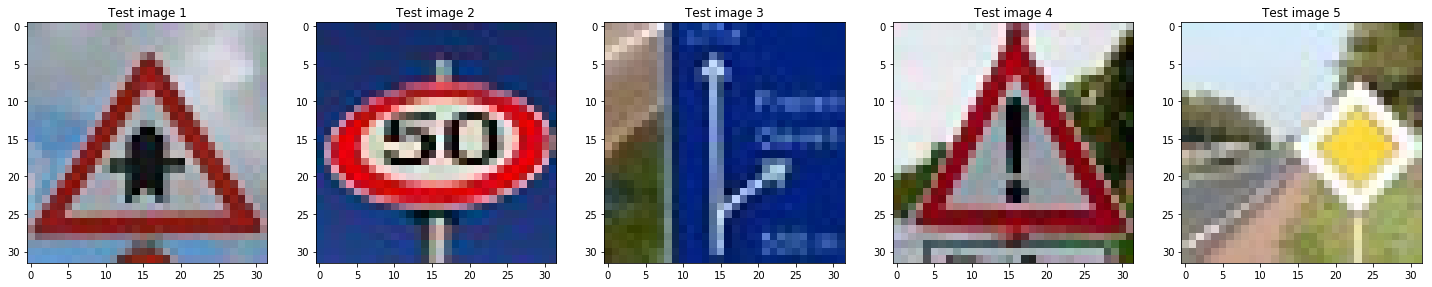

In [19]:
import matplotlib.image as mpimg

# Load the test images
directory = os.path.relpath('test_images')
test_image_files = np.array([mpimg.imread(os.path.join(directory, file)) for file in os.listdir(directory)])

# Plot the test images
img_count = len(test_image_files)
plt.figure(figsize=(img_count**2, img_count))
for i in range(img_count):
    plt.subplot(1, img_count, i+1)
    plt.imshow(test_image_files[i])
    plt.title('Test image {0}'.format(i+1))
plt.show()

# Pre-process images
test_image_files = normalize_img(test_image_files)

### Predict the Sign Type for Each Image

In [20]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.

model_name = 'dropout_0.4_epochs_20'
batch_size = 128

tf.reset_default_graph()

with tf.Session() as sess:
    
    # Load meta graph and restore weights
    new_saver = tf.train.import_meta_graph('saved_models/' + model_name + '.meta')
    new_saver.restore(sess, 'saved_models/' + model_name)
    
    # Restore ops and placeholders for calculating accuracy
    x, _, keep_prob = tf.get_collection('placeholders')
    logits = tf.get_collection('logits')[0]
    predict = tf.nn.softmax(logits)
    
    # Compute predictions
    feed_dict = {x: test_image_files, keep_prob: 1.0}
    predictions = sess.run(predict, feed_dict=feed_dict)
    label_indices = np.argmax(predictions, axis = 1)
    
    for num, index in enumerate(label_indices):
        description = class_descriptions.iloc[index]['SignName']
        print('Prediction for test image {0}: {1} - {2}'.format(num+1, index, description))

Prediction for test image 1: 11 - Right-of-way at the next intersection
Prediction for test image 2: 5 - Speed limit (80km/h)
Prediction for test image 3: 36 - Go straight or right
Prediction for test image 4: 18 - General caution
Prediction for test image 5: 25 - Road work


### Analyze Performance

In [21]:
ground_truth = [11, 2, 36, 18, 12] # Truth evaluated manually

n_missed = np.count_nonzero(ground_truth - label_indices)
accuracy = (5 - n_missed ) / 5
print('Accuracy on test images: {0:.1f}%'.format(accuracy*100))

Accuracy on test images: 60.0%


### Top 5 Softmax Probabilities For Each Image Found on the Web

In [22]:
# Display the top five softmax probabilities for the predictions on the German traffic sign images found on the web

with tf.Session() as sess:
    top_5 = tf.nn.top_k(tf.constant(predictions), k=5)
    top_kv = sess.run(top_5)
    
    values, indices = top_kv.values, top_kv.indices
    for i in range(5):
        descriptions = class_descriptions.iloc[indices[i]]['SignName']
        print('Top 5 predictions for test image {0}:'.format(i))
        for j in range(5):
            print('  {0}: ({1:.2f}) {2} - {3}'.format(j+1, values[i][j], indices[i][j], descriptions.iloc[j]))

Top 5 predictions for test image 0:
  1: (1.00) 11 - Right-of-way at the next intersection
  2: (0.00) 30 - Beware of ice/snow
  3: (0.00) 27 - Pedestrians
  4: (0.00) 28 - Children crossing
  5: (0.00) 40 - Roundabout mandatory
Top 5 predictions for test image 1:
  1: (0.99) 5 - Speed limit (80km/h)
  2: (0.01) 3 - Speed limit (60km/h)
  3: (0.00) 2 - Speed limit (50km/h)
  4: (0.00) 10 - No passing for vehicles over 3.5 metric tons
  5: (0.00) 14 - Stop
Top 5 predictions for test image 2:
  1: (0.96) 36 - Go straight or right
  2: (0.04) 38 - Keep right
  3: (0.00) 40 - Roundabout mandatory
  4: (0.00) 34 - Turn left ahead
  5: (0.00) 41 - End of no passing
Top 5 predictions for test image 3:
  1: (1.00) 18 - General caution
  2: (0.00) 27 - Pedestrians
  3: (0.00) 26 - Traffic signals
  4: (0.00) 24 - Road narrows on the right
  5: (0.00) 37 - Go straight or left
Top 5 predictions for test image 4:
  1: (1.00) 25 - Road work
  2: (0.00) 13 - Yield
  3: (0.00) 23 - Slippery road
  4:

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.